**Application 2.10: DTFS analysis of a sum of sines and cosines.**


---
This example aims at illustrating how the cosines and sines are mapped in the DTFS, especially when two of them have the same frequency.


#Python Code

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 32  # number of DFT points
n = np.arange(N)  # abscissa to generate signal below

# Generate signal x[n]
x = (
    2
    + 3 * np.cos((2 * np.pi * 6 / 32) * n)
    + 8 * np.sin((2 * np.pi * 12 / 32) * n)
    - 4 * np.cos((2 * np.pi * 7 / 32) * n)
    + 6 * np.sin((2 * np.pi * 7 / 32) * n)
)


# Calculate DFT of x
X = np.fft.fft(x) / N

# Mask numerical errors
X[np.abs(X) < 1e-12] = 0 #discard small values (numerical errors)
X = np.fft.fftshift(X) #rearrange to represent negative freqs.

k=np.arange(-N/2,N/2,1) #range with negative k (assume N is even)

#Graphics

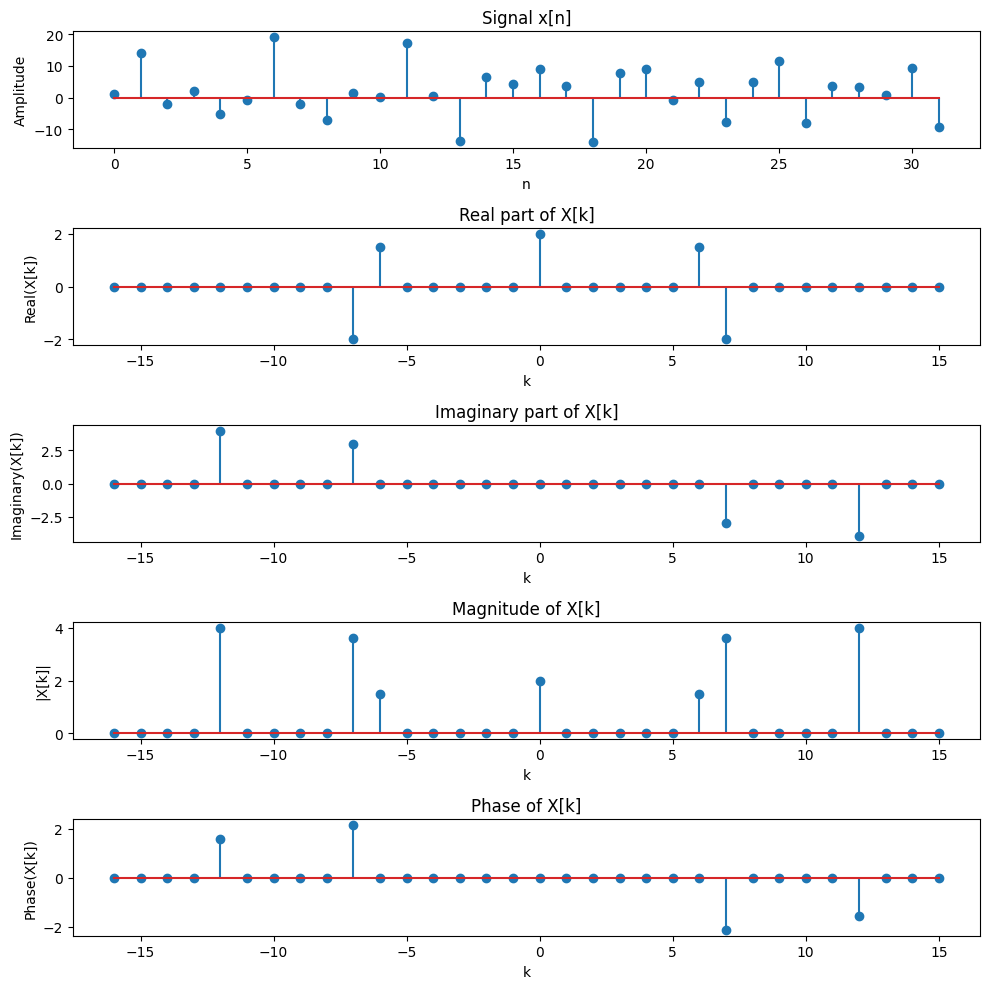

In [ ]:
# Plot x[n]
plt.figure(figsize=(10, 10))

plt.subplot(5, 1, 1)
plt.stem(n, x)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('Signal x[n]')

# Plot real part of X[k]
plt.subplot(5, 1, 2)
plt.stem(k, np.real(X))
plt.xlabel('k')
plt.ylabel('Real(X[k])')
plt.title('Real part of X[k]')

# Plot imaginary part of X[k]
plt.subplot(5, 1, 3)
plt.stem(k, np.imag(X))
plt.xlabel('k')
plt.ylabel('Imaginary(X[k])')
plt.title('Imaginary part of X[k]')

# Plot magnitude of X[k]
plt.subplot(5, 1, 4)
plt.stem(k, np.abs(X))
plt.xlabel('k')
plt.ylabel('|X[k]|')
plt.title('Magnitude of X[k]')

# Plot phase of X[k]
plt.subplot(5, 1, 5)
plt.stem(k, np.angle(X))
plt.xlabel('k')
plt.ylabel('Phase(X[k])')
plt.title('Phase of X[k]')

plt.tight_layout()
plt.show()

Note in Figure that the coefficient $X[0]$ is due to the DC level, $X[6]=X[-6]=1.5$ are due to the cosine $3\cos(6(2\pi/32)n)$, $X[12]=-4j$ and $X[-12]=4j$ are due to $8\sin(12(2\pi/32)n)$ , $X[7]=-2-3j$ and $X[-7]=-2+3j$ are due to the two parcels of frequency $7(2\pi/32)$ with the $-4\cos(7(2\pi/32)n)$ being represented by the real part (-2) and $6\sin(7(2\pi/32)n)$ represented by the imaginary part (3j).